In [2]:
from IPython.display import display, Image
from pprint import pprint

import pyx

from janet import *
sympy.init_printing()

In [3]:
cmk = (\
pyx.color.cmyk.Dandelion,\
pyx.color.cmyk.VioletRed,\
pyx.color.cmyk.RoyalPurple,\
pyx.color.cmyk.Cerulean,\
pyx.color.cmyk.Aquamarine,\
pyx.color.cmyk.ForestGreen,\
pyx.color.cmyk.YellowGreen,\
pyx.color.cmyk.Tan,\
)

t, l = 0.08, 1.
r = t*3
n, m = 8, 7

def drawMonom(j, k, mj, mk, clr):
    assert 0 <= mj <= 1
    assert 0 <= mk <= 1
    c.fill(pyx.path.circle(j*l, k*l, r), [clr])        
    c.fill(pyx.path.rect(j*l-r, k*l-r, mj*(n-j)*l+2*r, mk*(m-k)*l+2*r), [clr, pyx.color.transparency(0.75)])

def drawGrid():
    s = [pyx.style.linewidth.normal, pyx.deco.earrow.normal, pyx.style.linestyle.solid]
    c.stroke(pyx.path.line(0, 0, n*l + 0.7*l, 0), s)
    c.stroke(pyx.path.line(0, 0, 0, m*l + 0.7*l), s)

    s = [pyx.text.halign.boxcenter, pyx.text.valign.top]
    c.text(0, -r, r"$1_M$", s)
    for j in range(1, n+1):
        c.text(j*l, -r, r"$x^%d$" % j, s)
    s = [pyx.text.halign.boxright, pyx.text.valign.middle]
    for k in range(1, m+1):
        c.text(-r, k*l, r"$y^%d$" % k, s)    

    for j in range(n+1):
        for k in range(m+1):
            c.fill(pyx.path.circle(j*l, k*l, t))

In [4]:
var = ['x', 'y']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Monom(i)

In [5]:
x**7*y, x**5*y**2, x**4*y**3, x**2*y**4

([7 1], [5 2], [4 3], [2 4])

In [6]:
c = pyx.canvas.canvas()
drawMonom(7, 1, 1, 1, cmk[0])
drawMonom(5, 2, 1, 1, cmk[1])
drawMonom(4, 3, 1, 1, cmk[2])
drawMonom(2, 4, 1, 1, cmk[3])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


The difference between Gröbner bases and their extension by involutive bases is best illustrated. On the left figure, cones of divisible monomials are shown in different colors. As a result of fixing the monomial ordering in the general polynomial case, at the intersection points of the cones, it is necessary to compute $S$-polynomials with respect to the current basis and add them to the basis. Upon completion of this process, a Gröbner basis in the chosen ordering will be obtained. Now, to determine membership, it is sufficient to compute the polynomial's value with respect to the current basis. The sequence of reductions is unimportant since all $S$-polynomials already belong to the basis.

In [7]:
(x**5*y**2).lex(x**7*y), (x**4*y**3).lex(x**5*y**2), (x**2*y**4).lex(x**4*y**3)

In [8]:
(x**5*y**2).nonmult(x**7*y), (x**4*y**3).nonmult(x**7*y), (x**2*y**4).nonmult(x**7*y)

In [9]:
(x**4*y**3).nonmult(x**5*y**2), (x**2*y**4).nonmult(x**5*y**2)

In [10]:
(x**2*y**4).nonmult(x**4*y**3)

In [11]:
c = pyx.canvas.canvas()
drawMonom(7, 1, 1, 1, cmk[0])
drawMonom(5, 2, 0, 1, cmk[1])
drawMonom(4, 3, 0, 1, cmk[2])
drawMonom(2, 4, 0, 1, cmk[3])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [13]:
c = pyx.canvas.canvas()
drawMonom(2, 4, 1, 1, cmk[3])
drawMonom(5, 2, 1, 0, cmk[1])
drawMonom(4, 3, 0, 0, cmk[2])
drawMonom(7, 1, 1, 0, cmk[0])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [15]:
c = pyx.canvas.canvas()
drawMonom(7, 1, 1, 1, cmk[0])
drawMonom(6, 2, 0, 1, cmk[4])
drawMonom(5, 2, 0, 1, cmk[1])
drawMonom(4, 3, 0, 1, cmk[2])
drawMonom(3, 4, 0, 1, cmk[5])
drawMonom(2, 4, 0, 1, cmk[3])
drawGrid()
c.writePDFfile("divjanetfull")
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [16]:
c = pyx.canvas.canvas()
drawMonom(2, 4, 1, 1, cmk[3])
drawMonom(5, 2, 1, 0, cmk[1])
drawMonom(4, 3, 0, 0, cmk[2])
drawMonom(7, 1, 1, 0, cmk[0])
drawMonom(5, 3, 0, 0, cmk[4])
drawMonom(6, 3, 0, 0, cmk[5])
drawMonom(7, 3, 1, 0, cmk[6])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [17]:
c = pyx.canvas.canvas()
drawMonom(2, 4, 1, 1, cmk[3])
drawMonom(5, 2, 1, 0, cmk[1])
drawMonom(4, 3, 0, 0, cmk[2])
drawMonom(5, 3, 1, 0, cmk[4])
drawMonom(7, 1, 1, 0, cmk[0])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [18]:
c = pyx.canvas.canvas()
drawMonom(2, 4, 1, 1, cmk[3])
drawMonom(5, 3, 1, 0, cmk[4])
drawMonom(5, 2, 1, 0, cmk[1])
drawMonom(4, 3, 0, 0, cmk[2])
drawMonom(7, 1, 1, 0, cmk[0])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [10]:
print(CombRepet(5))
CombRepet(5, 2)

[1, 25/12, 35/24, 5/12, 1/24]


In [19]:
for i in range(7):
    print(i, CombRepet(6, 3).subs(i))

0 0
1 0
2 0
3 1
4 6
5 21
6 56


In [21]:
Monom.cmp = Monom.TOPdeglex # TOPlex, POTdeglex, POTlex

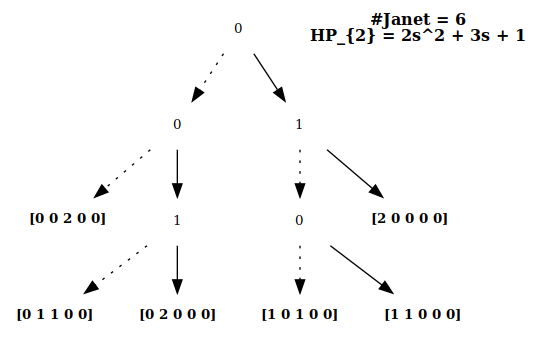

In [22]:
var = ['a', 'b', 'c', 'd', 'e']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))

pommaret = Janet()
q = pommaret.insert(Wrap(p) for p in (\
a**2, a*b, b**2, a*c, b*c, c**2))
assert q == []
pommaret.saveImage('pommaret.png')
pommaret.saveImage('pommaret.pdf')
Image('./pommaret.png')

In [23]:
var = ['a', 'b', 'c']
fun = []
Monom.init(var, fun)
Monom.cmp = Monom.TOPdeglex
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
perm3 = Janet()
q = perm3.insert(Wrap(p) for p in (a**3, b**3, c**3))
assert q == []

In [24]:
for i in range(3, 8):
    print(perm3.degMinProlong())
    assert perm3.degMinProlong() == i
    q = perm3.prolongDeg(i)
    print(f"prolong {i}")
    pprint(q)
    perm3.insert(w for w in q if not perm3.find(w.lm))

3
prolong 3
[      id: 15
ansector: [0 0 3]
      lm: [1 0 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 0 3], 1]],
       id: 16
ansector: [0 0 3]
      lm: [0 1 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[0 1 3], 1]],
       id: 17
ansector: [0 3 0]
      lm: [1 3 0]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 3 0], 1]]]
4
prolong 4
[      id: 18
ansector: [0 0 3]
      lm: [1 1 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 1 3], 1]],
       id: 19
ansector: [0 0 3]
      lm: [0 2 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[0 2 3], 1]],
       id: 20
ansector: [0 0 3]
      lm: [2 0 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[2 0 3], 1]],
       id: 21
ansector: [0 0 3]
      lm: [1 1 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 1 3], 1]],
       id: 22
ansector: [0 3 0]
      lm: [2 3 0]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[2 3 0], 1]]]
5
prolong 5
[      id: 23
ansector: [0 0 3]
      lm: [1 2 3]
 prolong: _ _ _
 nonmult: _ _ _
    poly: [[[1 2 3